<a href="https://colab.research.google.com/github/kevinomerkilic/computational_chemistry/blob/main/Figure2DataDigitized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Figure2DataSet2017.csv to Figure2DataSet2017.csv


In [ ]:
import pandas as pd

df = pd.read_csv("Figure2DataSet2017.csv")
print(df.columns.tolist())

['RED', 'Unnamed: 1', 'BLUE', 'Unnamed: 3', 'turquoise', 'Unnamed: 5', 'darkblue', 'Unnamed: 7', 'green', 'Unnamed: 9', 'purple', 'Unnamed: 11']


In [ ]:
import pandas as pd
import numpy as np

# Load the CSV file (replace with your actual file name)
df = pd.read_csv("Figure2DataSet2017.csv")

# Define the group names based on your columns
groups = ["RED", "BLUE", "turquoise", "darkblue", "green", "purple"]

# Assign correct column names
new_columns = []
for group in groups:
    new_columns.extend([f"{group}_X", f"{group}_Y"])
df.columns = new_columns

# Convert X and Y values to float, in case any were strings
for group in groups:
    df[f"{group}_X"] = pd.to_numeric(df[f"{group}_X"], errors='coerce')
    df[f"{group}_Y"] = pd.to_numeric(df[f"{group}_Y"], errors='coerce')

# Calculate diameter and assign K
for group in groups:
    df[f"{group}_diameter_nm"] = 1 / df[f"{group}_X"]
    df[f"{group}_K_GPa"] = df[f"{group}_Y"]

# Drop rows with NaNs in critical columns (diameter and K)
required_cols = [f"{g}_diameter_nm" for g in groups] + [f"{g}_K_GPa" for g in groups]
df_clean = df.dropna(subset=required_cols)

# ✅ Display ALL rows of the cleaned DataFrame
pd.set_option('display.max_rows', None)

# Print relevant columns only
print(df_clean[[f"{g}_diameter_nm" for g in groups] + [f"{g}_K_GPa" for g in groups]])

# Optionally, export it
df_clean.to_csv("cleaned_bulkmodulus_data.csv", index=False)


    RED_diameter_nm  BLUE_diameter_nm  turquoise_diameter_nm  \
1          9.003690          8.998823               9.003690   
2          8.000000          7.996850               8.000000   
3          6.991404          7.006195               6.991404   
4          6.506667          6.505529               6.489362   
5          5.995086          5.496921               5.995086   
6          5.495495          4.996895               5.495495   
7          5.000000          3.997319               5.000000   
8          4.747082          3.750490               4.747082   
9          4.493554          3.499953               4.493554   
10         4.250871          3.249108               4.250871   
11         4.000000          2.999096               4.000000   
12         3.748080          2.750066               3.748080   
13         3.500717          2.499505               3.500717   
14         3.249001          2.249670               3.249001   
15         2.997543          4.747082   

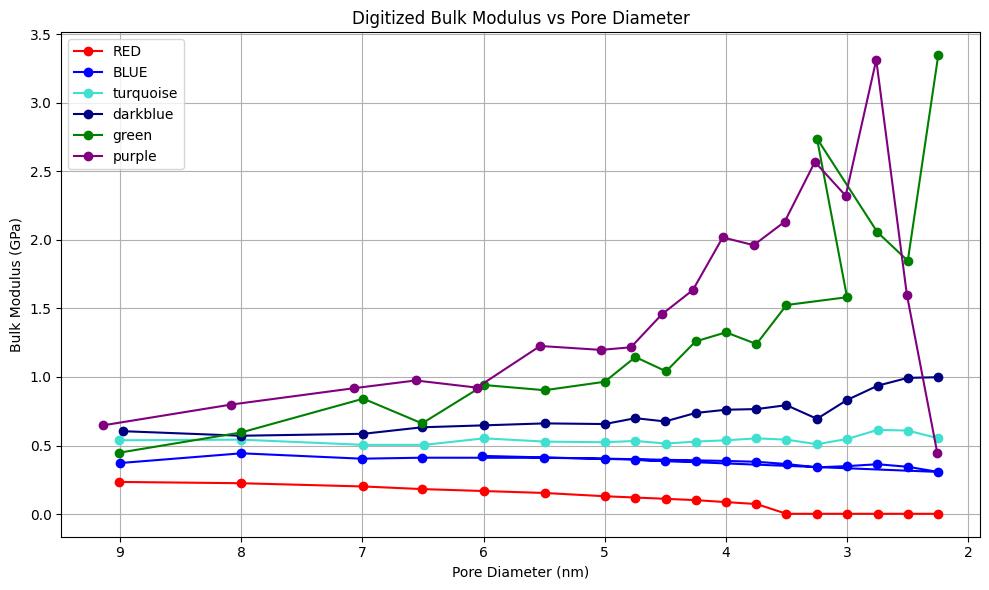

In [ ]:
import matplotlib.pyplot as plt

# Define groups and colors
groups = ["RED", "BLUE", "turquoise", "darkblue", "green", "purple"]
colors = ["red", "blue", "turquoise", "navy", "green", "purple"]

plt.figure(figsize=(10, 6))

# Loop through and plot each group's data
for group, color in zip(groups, colors):
    x = df_clean[f"{group}_diameter_nm"]
    y = df_clean[f"{group}_K_GPa"]
    plt.plot(x, y, marker='o', label=group, color=color)

# Match paper style: decreasing pore diameter left to right
plt.gca().invert_xaxis()

# Labels and formatting
plt.title("Digitized Bulk Modulus vs Pore Diameter")
plt.xlabel("Pore Diameter (nm)")
plt.ylabel("Bulk Modulus (GPa)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


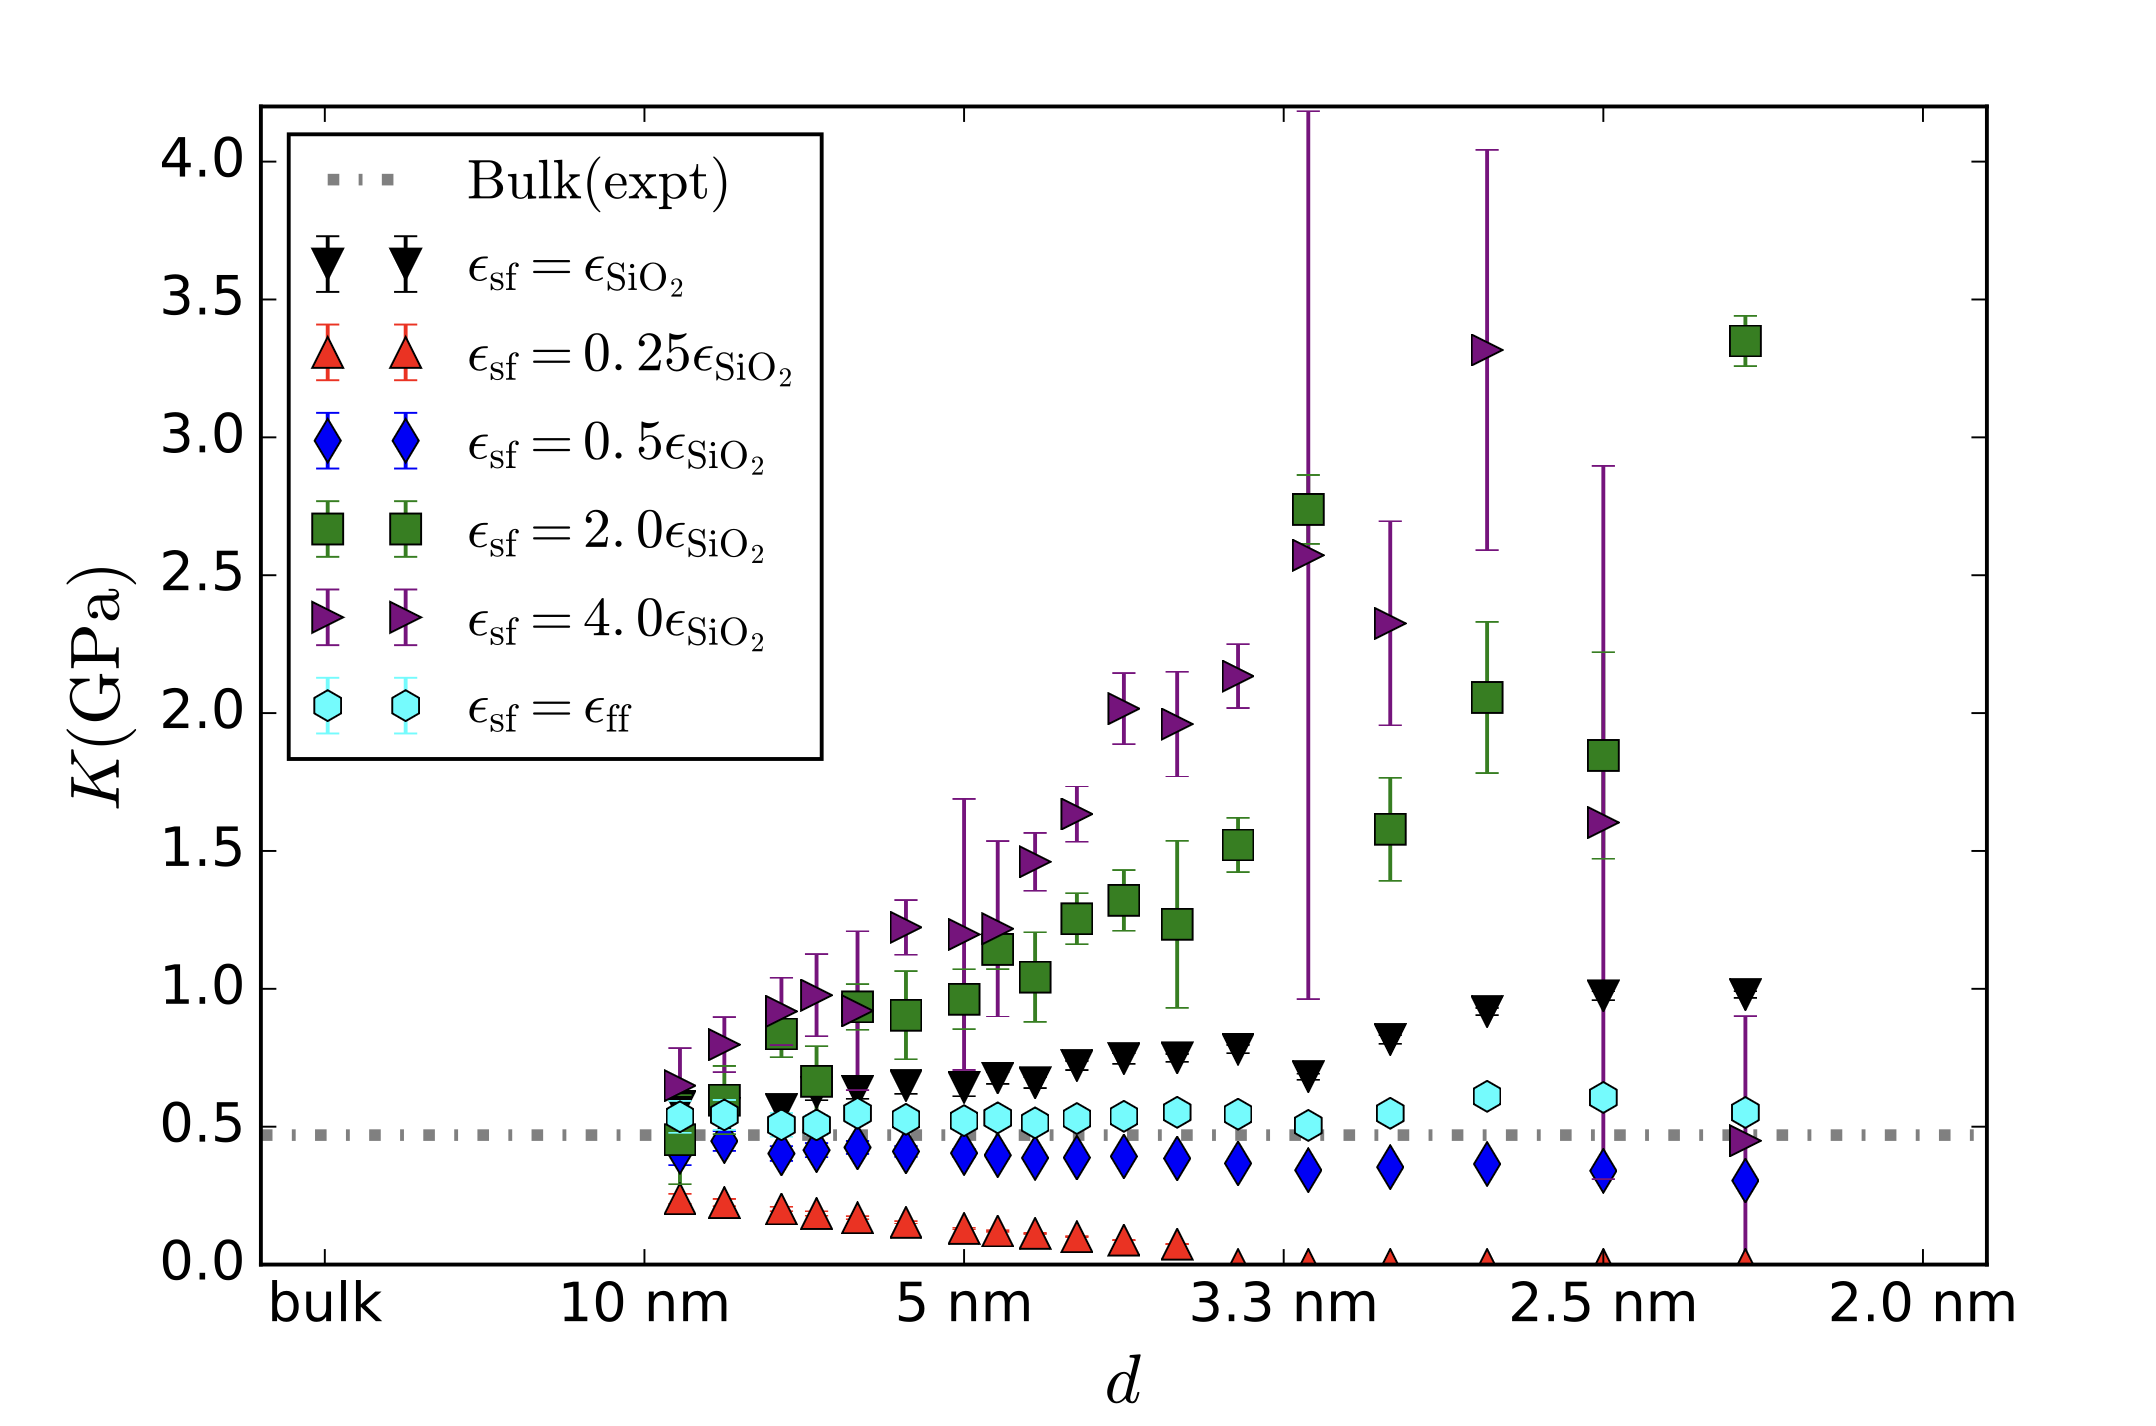